<h4 align="center" >Sprawozdanie</h4>
<h4 align="center" >Elektronika analogowa</h4>
<h1 align="center" >Filtry Pasywne</h1>

<div style="width: 100%; height: 100px;"></div>

# 1. Wstep

Filtrem częstotliwości nazywamy układ o strukturze czwórnika (czwórnik to układ mający cztery zaciski – jedna z par zacisków pełni rolę wejścia, zaś druga wyjścia), który przepuszcza bez tłumienia lub z małym tłumieniem napięcia i prądy o określonym paśmie częstotliwości, a tłumi napięcia i prądy leżące poza tym pasmem. Filtry częstotliwości mają głównie zastosowanie w urządzeniach elektronicznych i energetycznych.

Wyrozniamy filtry aktywne, czyli takie w, ktorych ukladzie wykorzystuje sie elementy aktywne takie jak wzmacniacze operacyjne. Na zajeciach zajmowalismy sie filtrami pasywnymi zbudowanych z samych elementow pasywnych.

In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Filtr dolnoprzepustowy

Pracowalismy na stanowisku numer 5 przydzielona do naszego stanowiska rezystancja wynosila $10 k\Omega$ natomiast pojemnosc wynosila $330 pF$. Do pomiarow wykorzystalismy kondensator o pojemnosci $408 pF$ oraz rezystor o rezystancji $9,9664 k\Omega$.

In [2]:
R = 9.9664 * 10e3
C = 330 * 10e-12

# Czestotliwosc graniczna naszego filtra
borderFreq = 1 / (2* np.pi * R * C)
print(f"Czestotliwosc graniczna uzytego filtra wynosi: {borderFreq}")

Czestotliwosc graniczna uzytego filtra wynosi: 483.9136562239894


<div style="width: 100%; height: 100px;"></div>

### Transmitancja filtra dolno przepustowego

$$G(s) = \frac{1}{1 + RCs}$$
$$G(s) = \frac{1}{1 + 3.288912 \cdot 10^{-4}s}$$

In [3]:
dolnoPrzepustowy = pd.read_csv("dolno_przepustowy.csv", sep=";")
dolnoPrzepustowy["G[db]"] = 20 * np.log10(dolnoPrzepustowy["Vpp_wyj"] / dolnoPrzepustowy["Vpp_wej"])
dolnoPrzepustowy

,Vpp_wyj,Vpp_wej,Freq,G[db]
0,1.04,1.02,1.0,0.168663
1,1.04,1.02,1.3,0.168663
2,1.04,1.02,1.7,0.168663
3,1.04,1.02,2.1,0.168663
4,1.02,1.02,2.8,0.000000
5,1.04,1.02,3.6,0.168663
6,1.02,1.02,4.6,0.000000
7,1.04,1.02,6.0,0.168663
8,1.00,1.02,7.7,-0.172003
9,1.00,1.02,10.0,-0.172003


<div style="width: 100%; height: 240px;"></div>

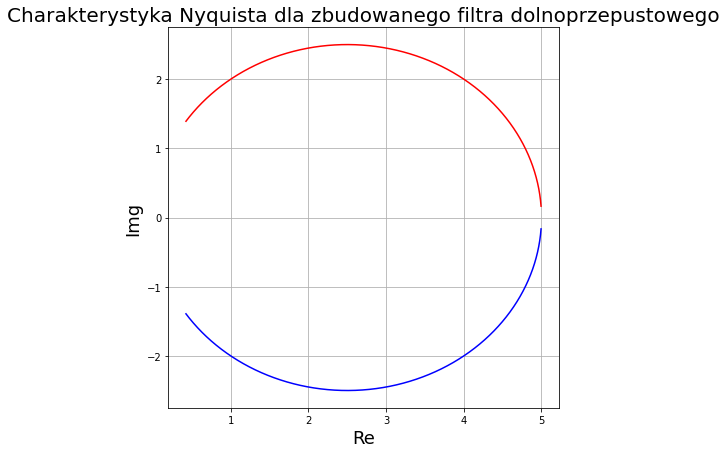

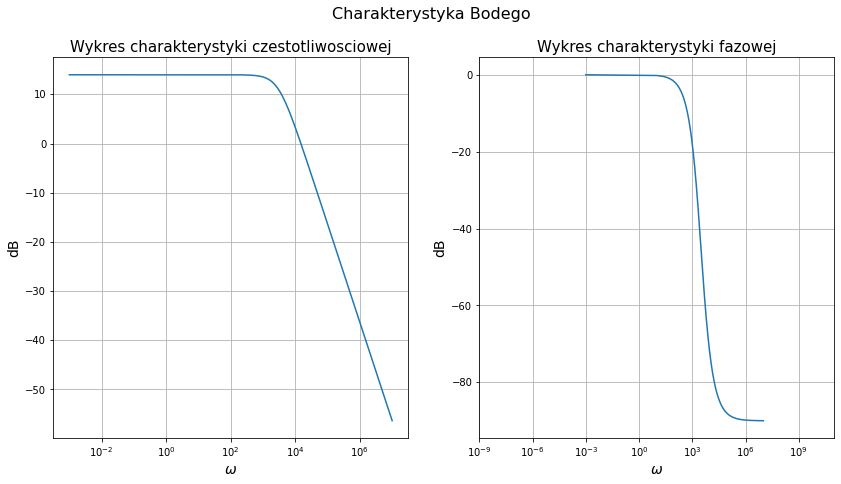

In [25]:
num = [0, 5]
den = [R*C, 1]
s1 = signal.TransferFunction(num, den)

w, nyquist = signal.freqresp(s1)
clear_output()

plt.figure(figsize=(7, 7))
plt.title("Charakterystyka Nyquista dla zbudowanego filtra dolnoprzepustowego", fontsize=20)
plt.plot(nyquist.real, nyquist.imag, "b")
plt.plot(nyquist.real, -nyquist.imag, "r")
plt.xlabel("Re", fontsize=18)
plt.ylabel("Img", fontsize=18)
plt.grid()
plt.show()

w, mag, phase = signal.bode(s1, w=np.linspace(10e-4, 10e6, 1000000))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle("Charakterystyka Bodego", fontsize=16)
ax1.semilogx(w, mag)
ax1.grid()
ax1.set_title("Wykres charakterystyki czestotliwosciowej", fontsize=15)
ax1.set_xlabel("$\omega$", fontsize=14)
ax1.set_ylabel("dB", fontsize=14)

ax2.semilogx(w, phase)
ax2.set_xlim(10e-10, 10e10)
ax2.set_title("Wykres charakterystyki fazowej", fontsize=15)
ax2.grid()
ax2.set_xlabel("$\omega$", fontsize=14)
ax2.set_ylabel("dB", fontsize=14)
plt.show()